📊 Linear Regression Analysis
🧩 Objective



Predict 'Normalized Max RH' (Maximum Relative Humidity) using temperature and minimum humidity variables from the agricultural dataset.

📁 Dataset Overview

Total Records: 103
    
Numeric Columns:
    
    'Normalized Max Temp'

    'Normalized Min Temp'

    'Normalized Min RH'

    'Normalized Max RH' (Target)

Dataset Link : https://data.mendeley.com/datasets/8pvfs5wyzf/5
        
File Name : 03. Selected Cluster Dataset for final analysis From Process 02_cluster 3

📑 Model Equation : 
    
Predicted Normalized Max RH=0.440+0.014⋅(’Normalized Max Temp’)−0.029⋅(’Normalized Min Temp’)+0.431⋅(’Normalized Min RH’)

🌾 Linear Regression Model Results 🌾
R² Score:               0.445
Mean Absolute Error:    0.134
Root Mean Squared Error:0.192

Model Coefficients:
  'Normalized Max Temp': 0.014
  'Normalized Min Temp': -0.029
  'Normalized Min RH': 0.431

Intercept: 0.440

🔥 Top 3 Most Influential Features 🔥
  'Normalized Min RH': 0.431
  'Normalized Min Temp': -0.029
  'Normalized Max Temp': 0.014


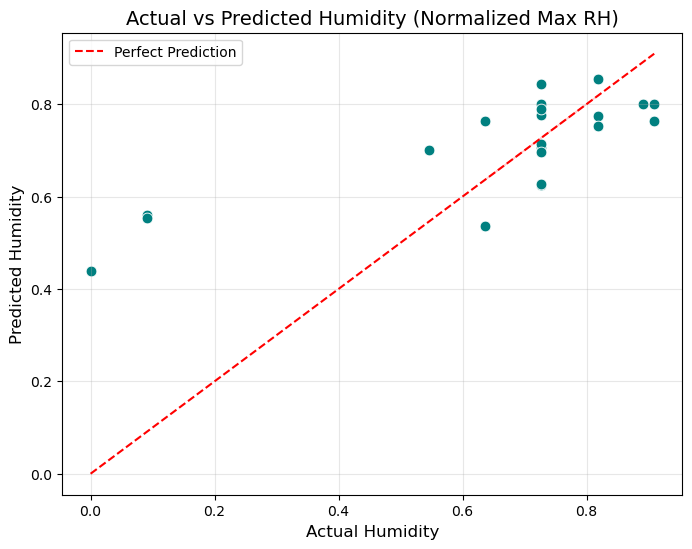

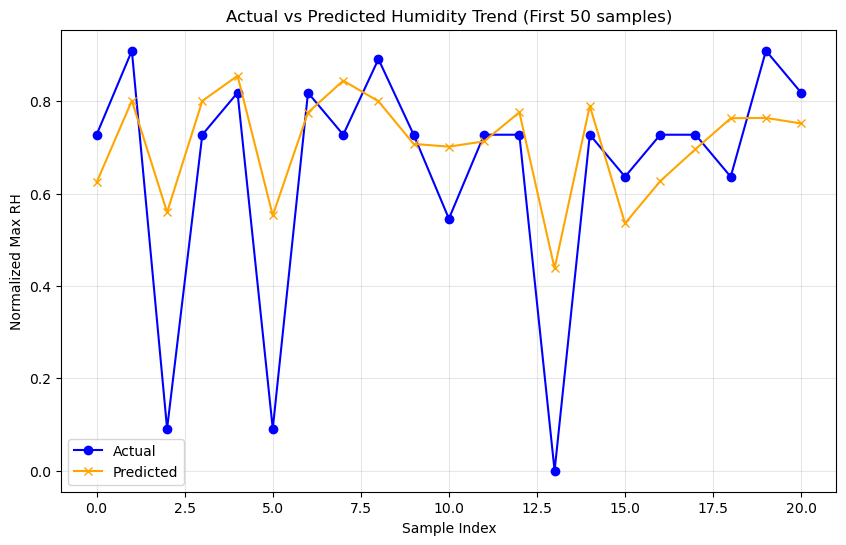

In [6]:
# =======================
# LINEAR REGRESSION MODEL
# =======================

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Load Dataset
# -----------------------
file_path = r"D:\Projects and All\gitupload\upload-folders\DataScienceProject2\DataScienceProject\Machine-and-Deep-Learning-Projects\Machine-Learning\Linear-Regression-Model\agricultural-dataset\03. Selected Cluster Dataset for final analysis From Process 02_cluster 3.csv"
df = pd.read_csv(file_path)

# -----------------------
# Select relevant numeric columns
# -----------------------
X = df[["'Normalized Max Temp'", "'Normalized Min Temp'", "'Normalized Min RH'"]]
y = df["'Normalized Max RH'"]

# -----------------------
# Split Dataset
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# Create and Train Model
# -----------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------
# Function: Show Results & Visualizations
# -----------------------
def show_model_results(model, X_test, y_test, sample_size=50):
 
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    r2  = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Coefficients
    coefficients = dict(zip(X_test.columns, model.coef_))
    intercept = model.intercept_
    
    # Identify Top 3 Features by absolute coefficient
    sorted_features = sorted(coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
    top_features = sorted_features[:3]
    
    # Print Results
    print("="*60)
    print("🌾 Linear Regression Model Results 🌾")
    print("="*60)
    print(f"R² Score:               {r2:.3f}")
    print(f"Mean Absolute Error:    {mae:.3f}")
    print(f"Root Mean Squared Error:{rmse:.3f}")
    print("\nModel Coefficients:")
    for feature, coef in coefficients.items():
        print(f"  {feature}: {coef:.3f}")
    print(f"\nIntercept: {intercept:.3f}")
    print("\n🔥 Top 3 Most Influential Features 🔥")
    for feature, coef in top_features:
        print(f"  {feature}: {coef:.3f}")
    print("="*60)
    
    # Scatter Plot: Actual vs Predicted
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, color="teal", s=60, edgecolor="white")
    sns.lineplot(x=y_test, y=y_test, color="red", label="Perfect Prediction", linestyle="--")
    plt.title("Actual vs Predicted Humidity (Normalized Max RH)", fontsize=14)
    plt.xlabel("Actual Humidity", fontsize=12)
    plt.ylabel("Predicted Humidity", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    # Line Plot: Trend Comparison
    plt.figure(figsize=(10,6))
    plt.plot(y_test.values[:sample_size], label='Actual', color='blue', marker='o')
    plt.plot(y_pred[:sample_size], label='Predicted', color='orange', marker='x')
    plt.title(f"Actual vs Predicted Humidity Trend (First {sample_size} samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Normalized Max RH")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    return r2, mae, rmse, coefficients, intercept, top_features

# -----------------------
# Call the function to show results
# -----------------------

r2, mae, rmse, coefs, intercept, top_features = show_model_results(model, X_test, y_test)


☑ Insights from Coefficients

'Normalized Min RH' has the largest positive effect (0.431) → when minimum relative humidity rises, maximum relative humidity also rises.

'Normalized Min Temp' has a small negative effect (-0.029) → higher minimum temperature slightly lowers max RH.

'Normalized Max Temp' has a very small positive effect (0.014) → almost negligible influence.

Top influencer: 'Normalized Min RH' by far.

☑ Interpretation of Metrics

R² = 0.445 → ~44.5% of the variation in max RH is explained by these 3 features. Not perfect, but reasonable for environmental/agriculture data.

MAE = 0.134 → on average, predictions are off by 0.134 units (normalized scale).

RMSE = 0.192 → standard deviation of prediction error. Lower is better.

☑ Practical Interpretation

The model shows humidity is highly influenced by minimum relative humidity, which makes sense physically.

Temperature has minor effects in your dataset.

For farmers or agronomists: monitoring minimum humidity is more critical for predicting daily max humidity.